## 1. Necessary Libraries!

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read Dataset

In [146]:
cell_df = pd.read_csv('KDDTrain+.txt')
cell_df.head()
# cell_df.shape
# cell_df.size
# cell_df.count()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


## 2.1 Adjust Column

In [99]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

cell_df.columns = columns

In [100]:
cell_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


## 2.2 Data Insight

In [101]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [102]:
cell_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


## 3. Data Cleaning

### 3.1 Null values

In [103]:
cell_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset doesnot contain any null values.

In [104]:
#helper function for deeper analysis
def unique_values(cell_df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = cell_df[column_name].unique()
        value_counts = cell_df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [105]:
cat_features = cell_df.select_dtypes(include='object').columns
unique_values(cell_df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

In [106]:
cell_df.duplicated().sum()

0

NO DUPLICATED ROW

## 3.3 OUTLIERS

In [107]:
cell_df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

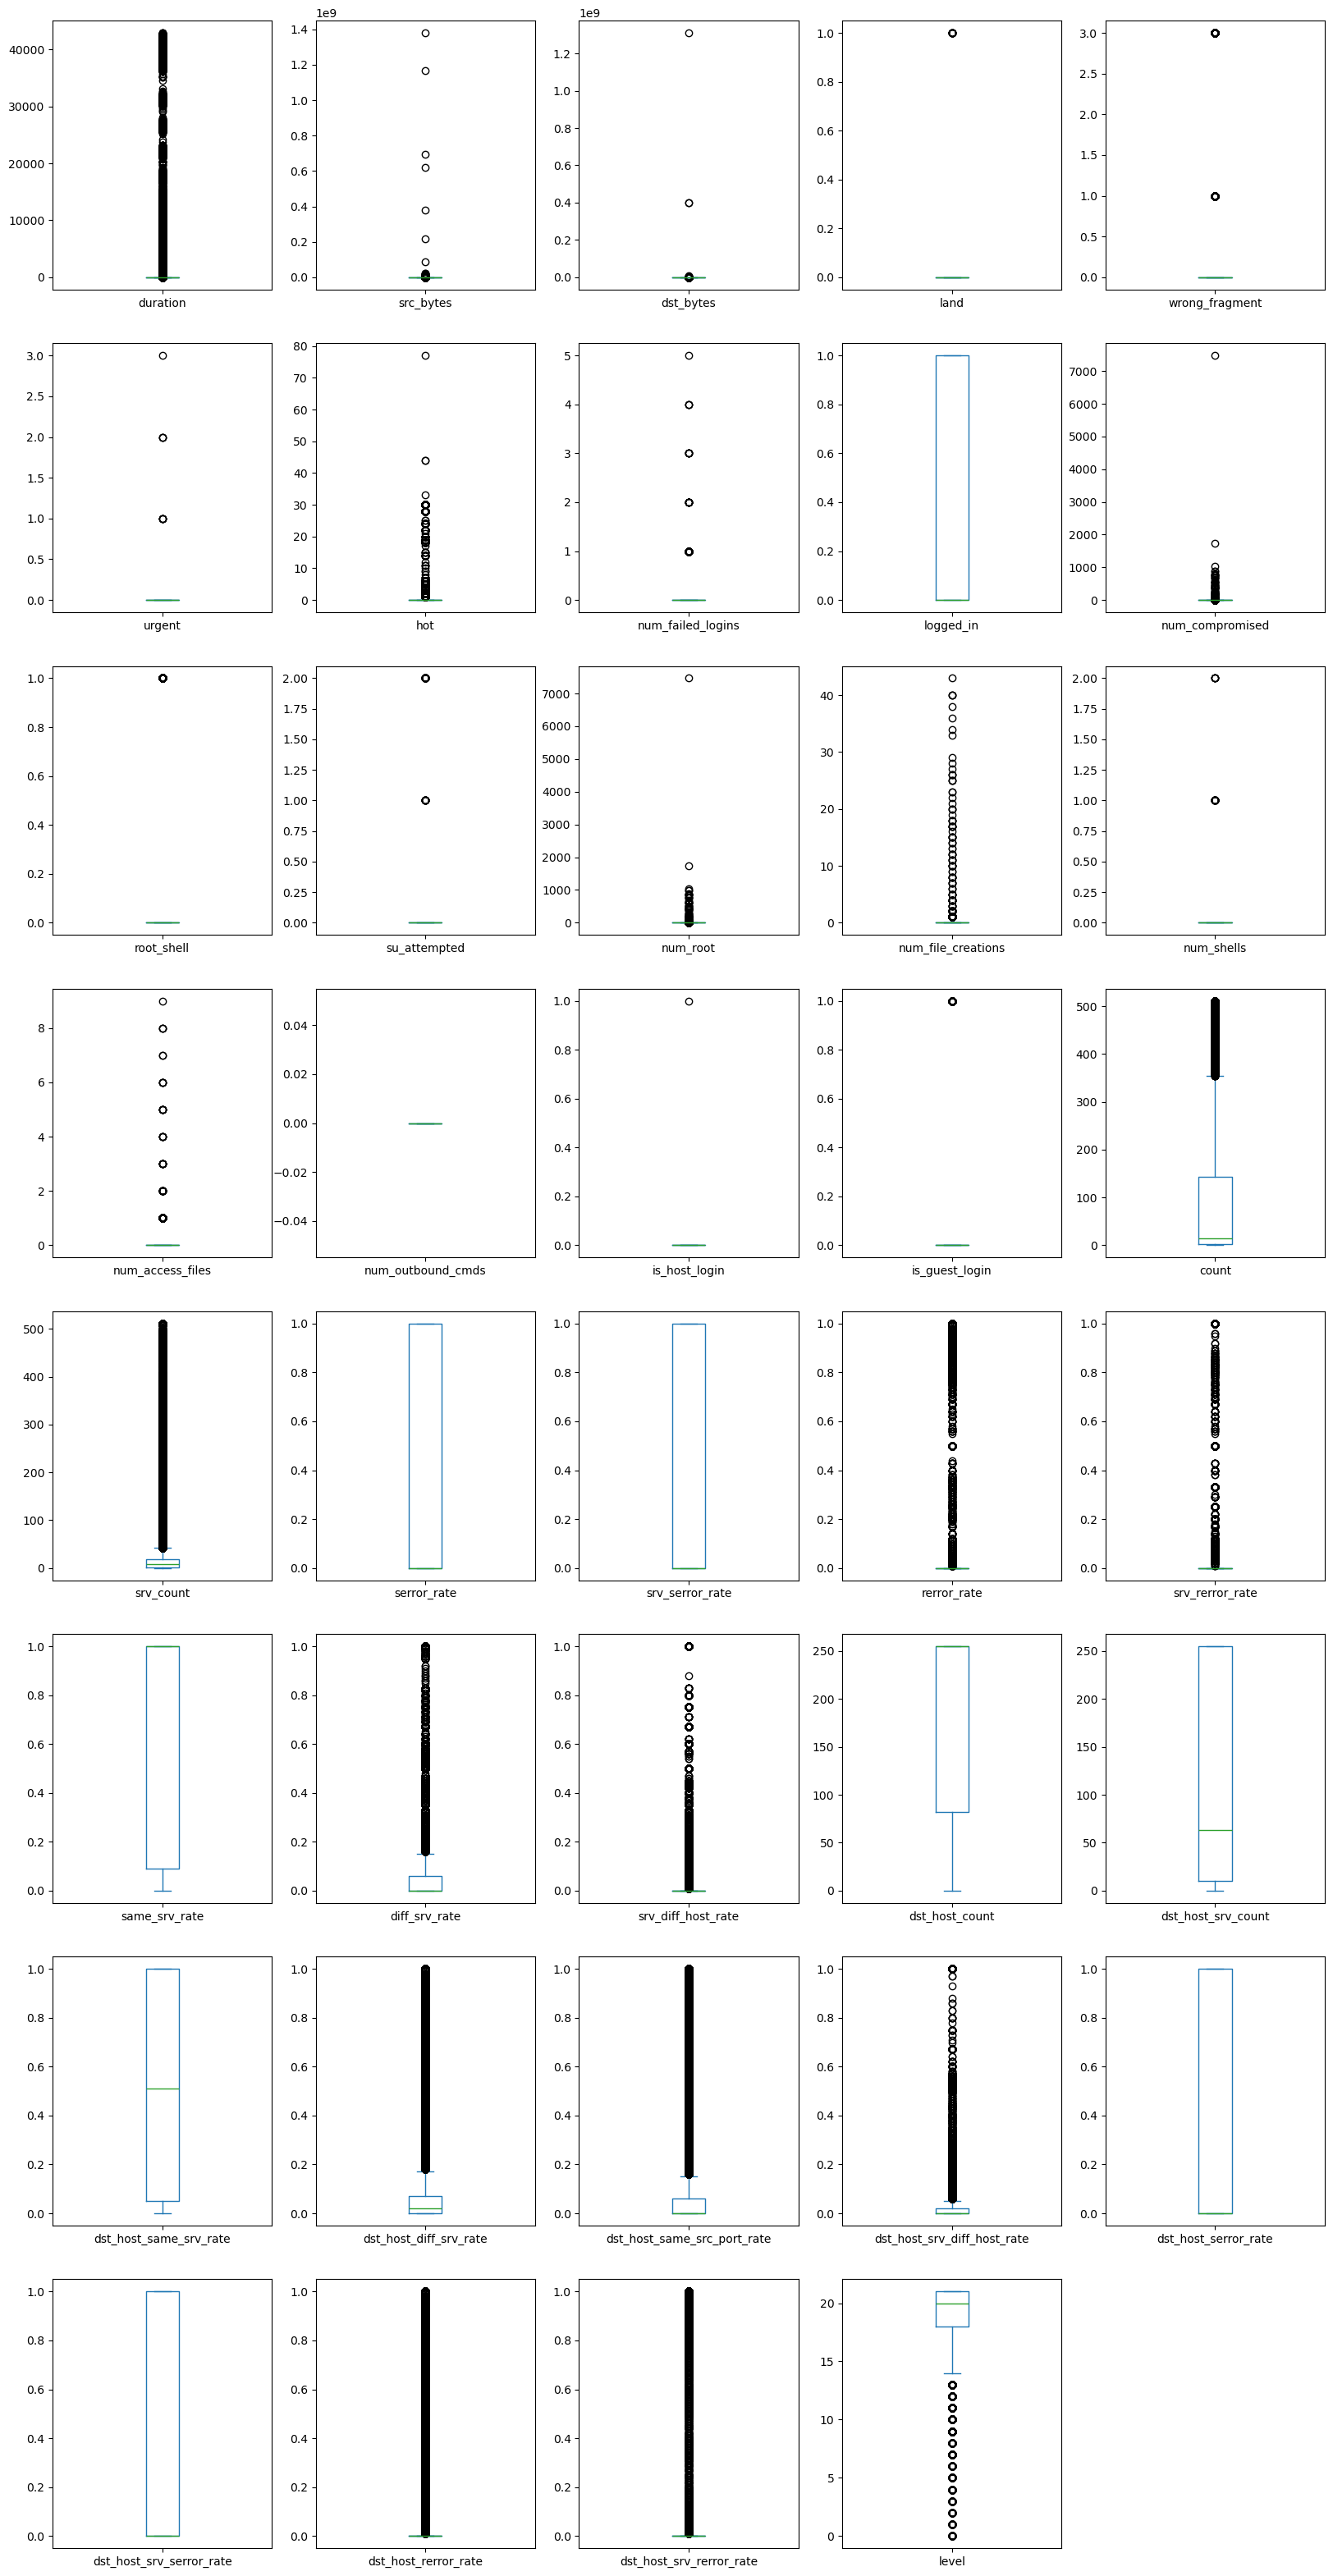

In [108]:
plt.figure(figsize=(20,40))
cell_df.plot(kind= "box", subplots = True, layout = (8,5), figsize = (20,40))
plt.show()

## 3.4 CLASSIFY ATTACK OR NOT

In [109]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
cell_df['attack'] = attack_n 

In [110]:
cell_df['attack'].unique()

array(['normal', 'attack'], dtype=object)

## 4. Exploratory data analysis (EDA) - visualization

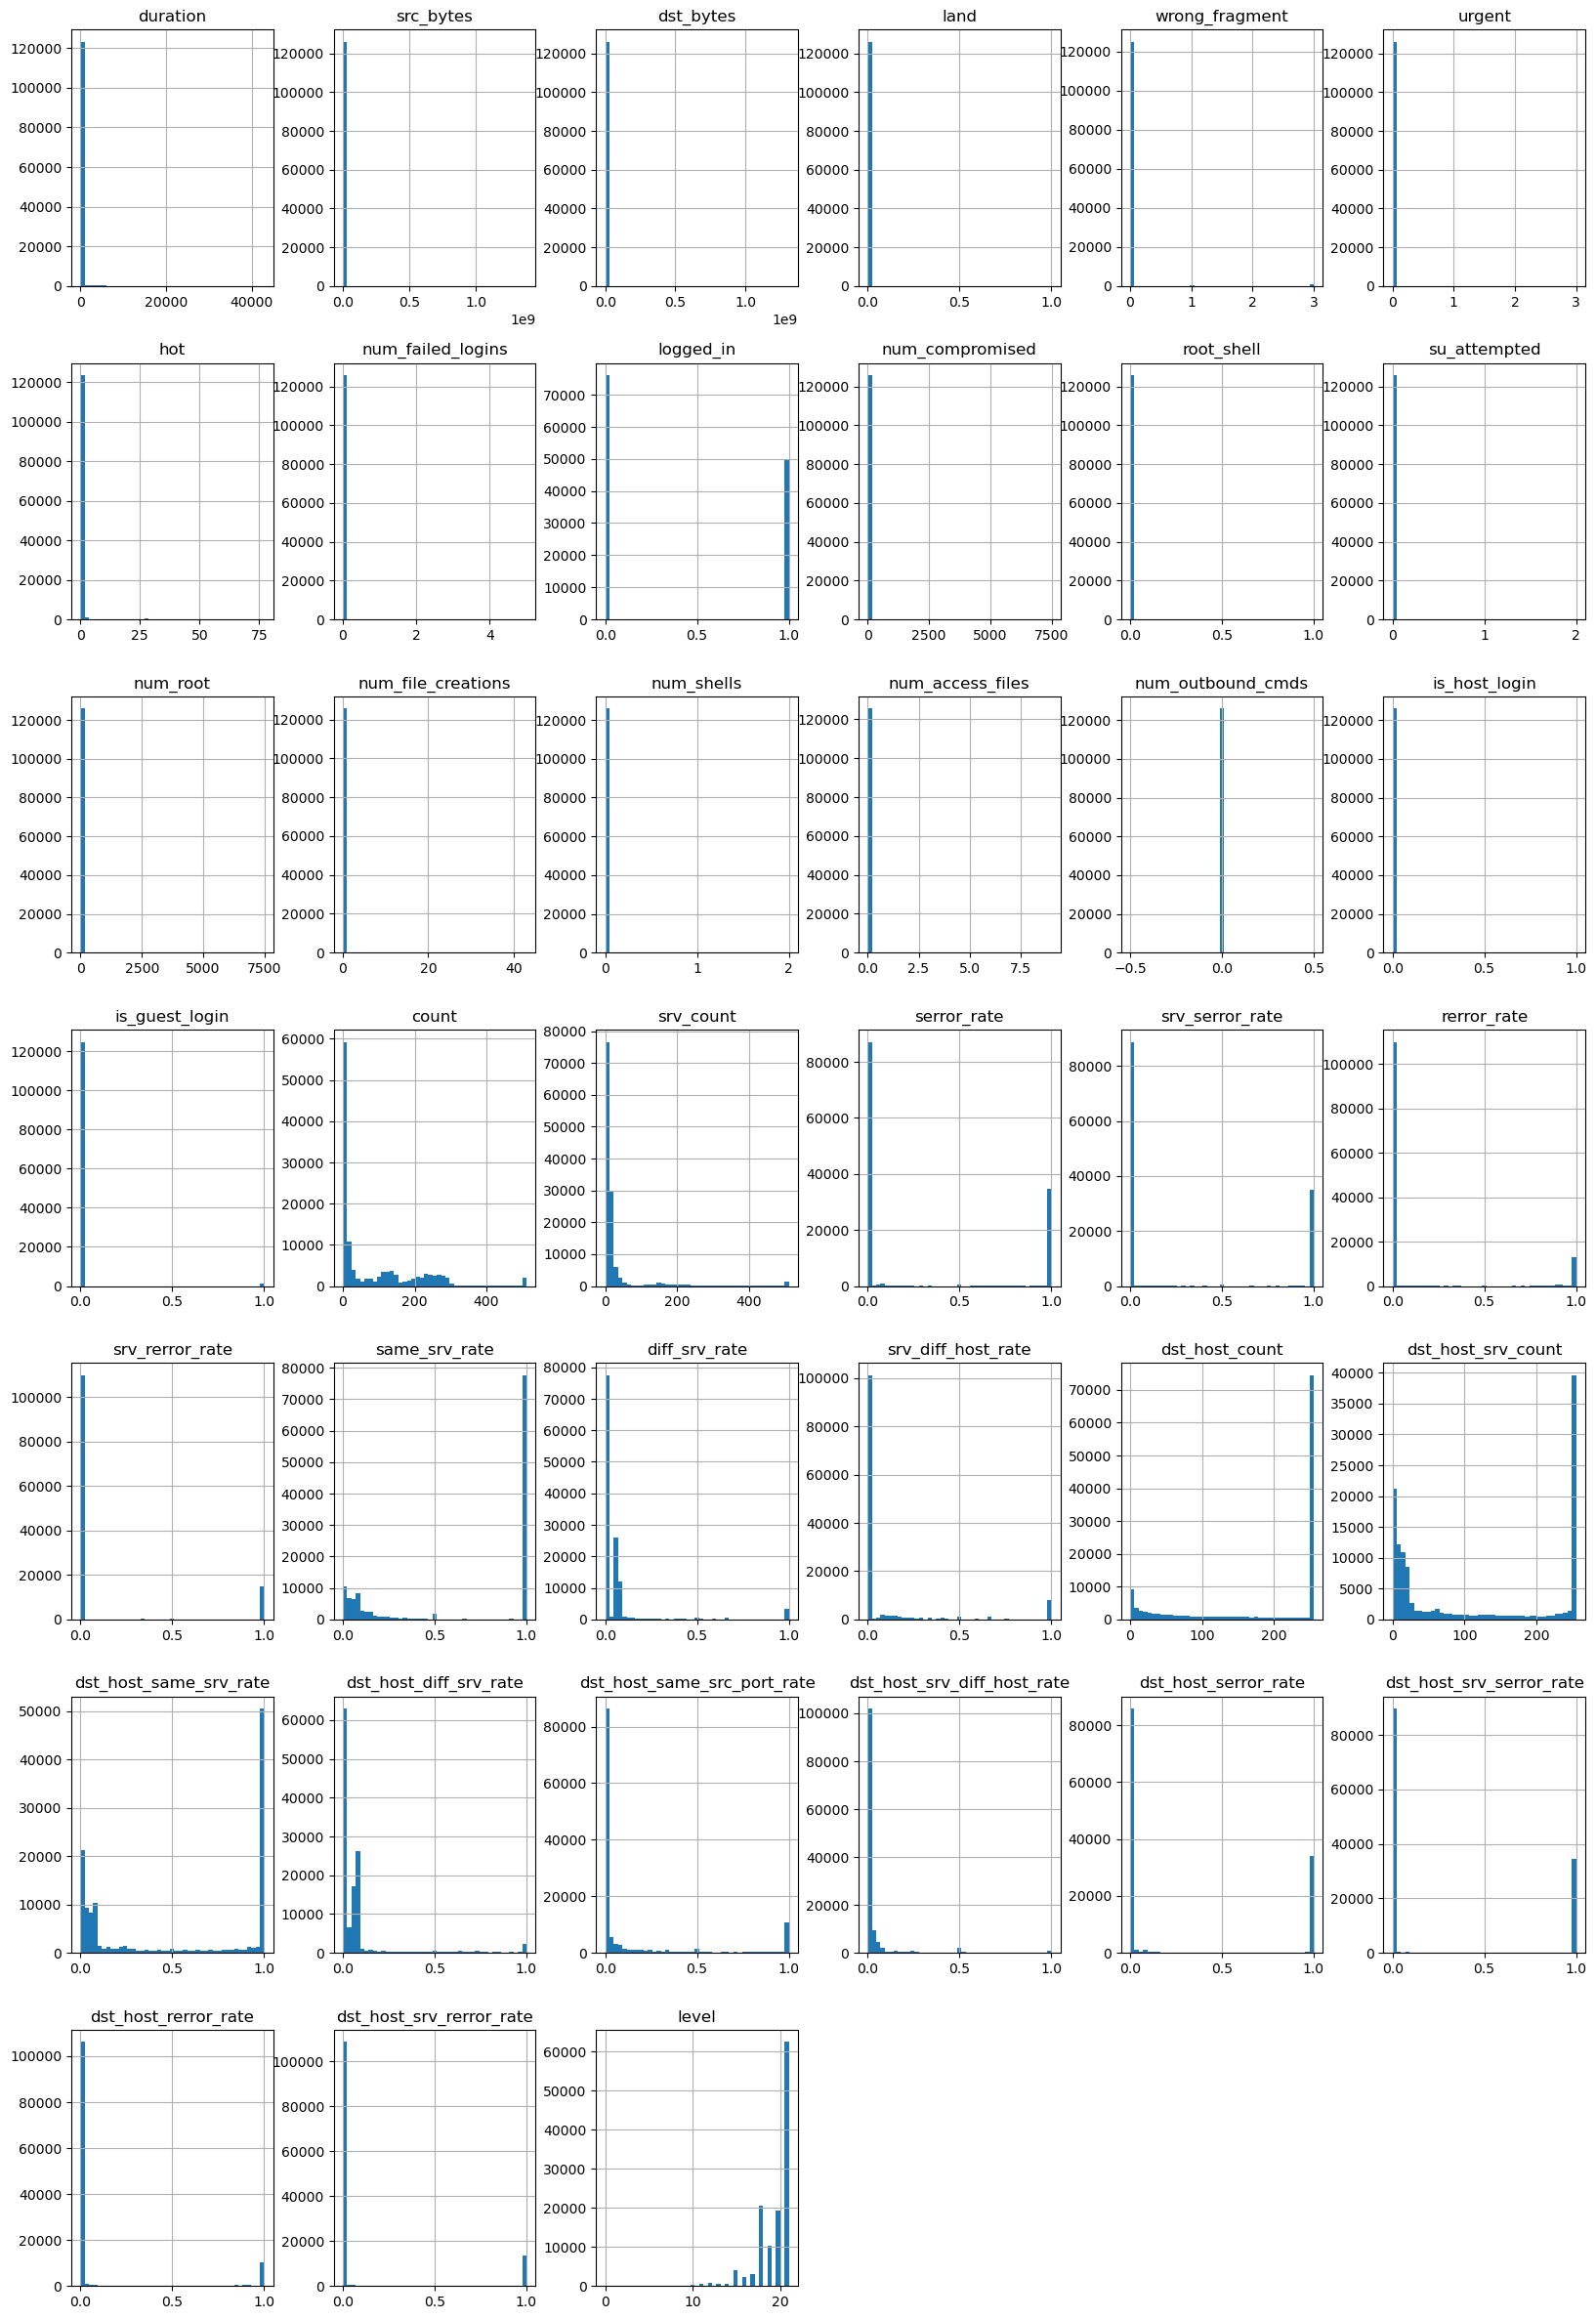

In [111]:
cell_df.hist(bins=43,figsize=(20,30));

create histograms for all numerical columns in a DataFrame

## 4.1 Protocol Type

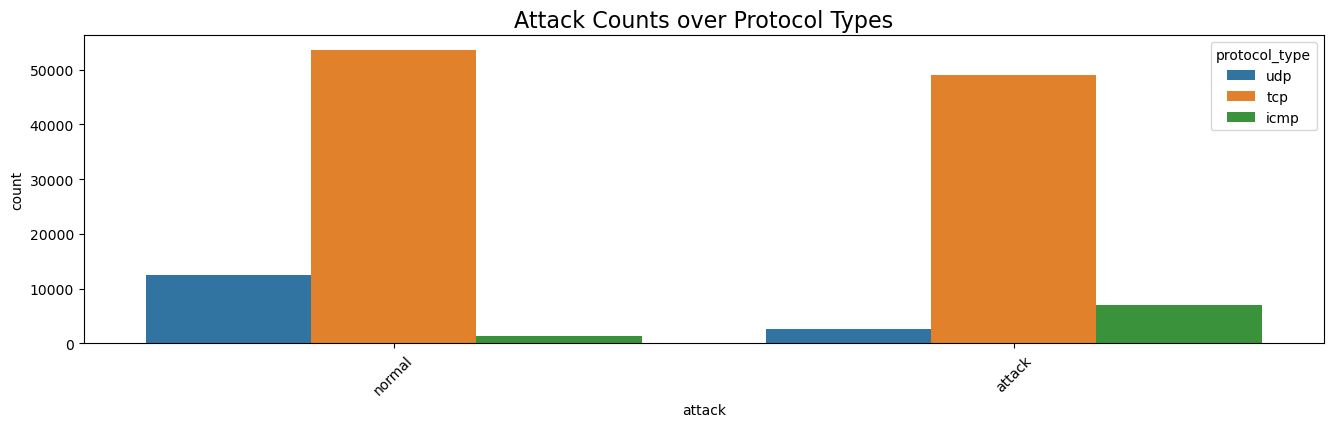

In [112]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=cell_df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [113]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [114]:
cell_df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815165
udp     0.119019
icmp    0.065816
Name: proportion, dtype: float64

## 4.2 Service used general

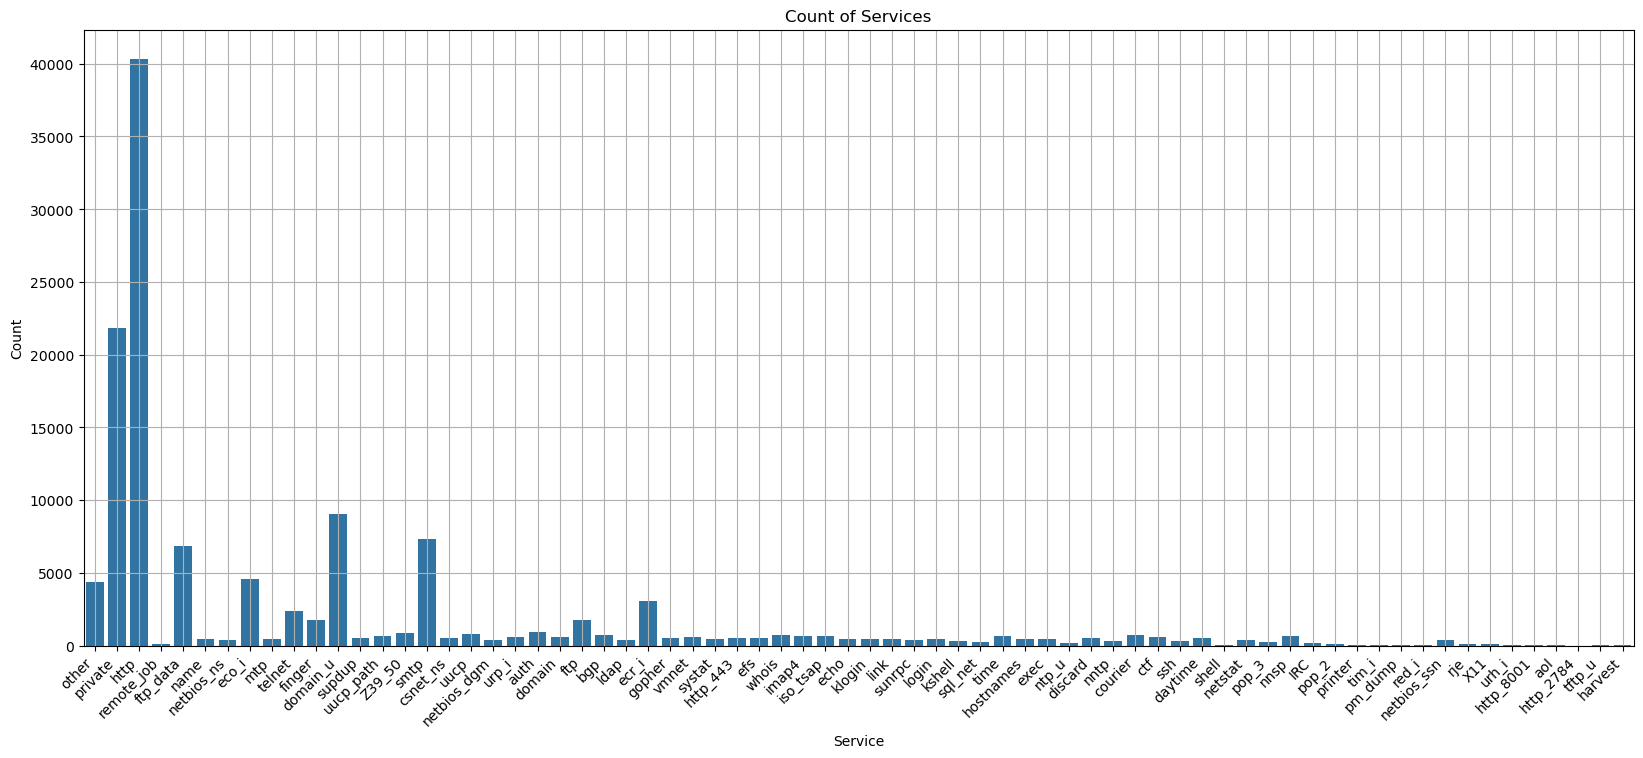

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [116]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

## 4.3 Service used effect on attacks

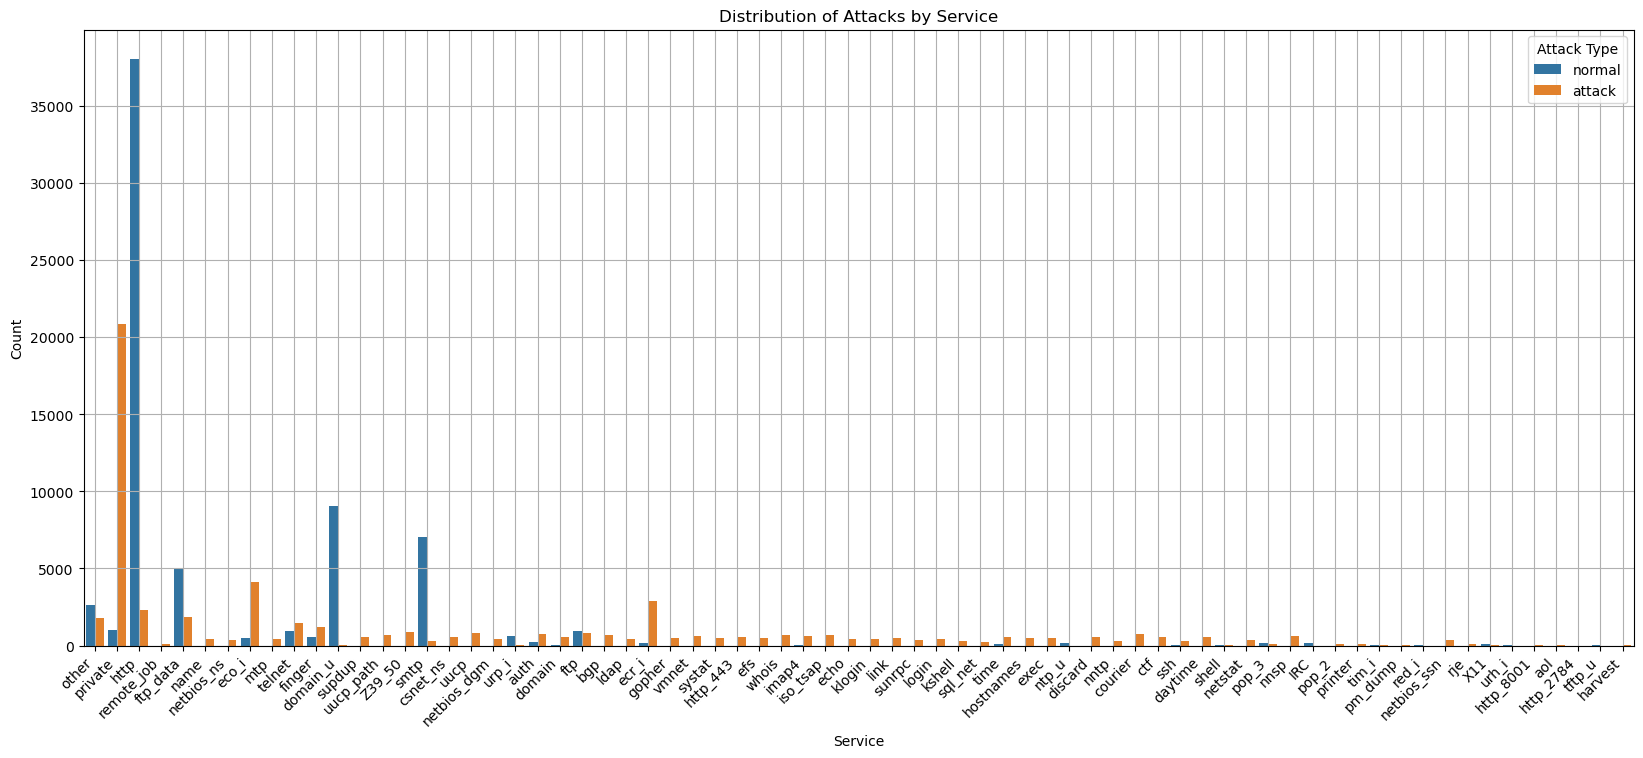

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [118]:
#we can see that private attacks is most common service 

## 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

In [119]:
#visualizes the distribution of the duration variable in our dataset, grouped by different categories in the flag variable.

C:\Users\shree\AppData\Local\Temp\ipykernel_25572\299523418.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


<Figure size 1200x800 with 0 Axes>

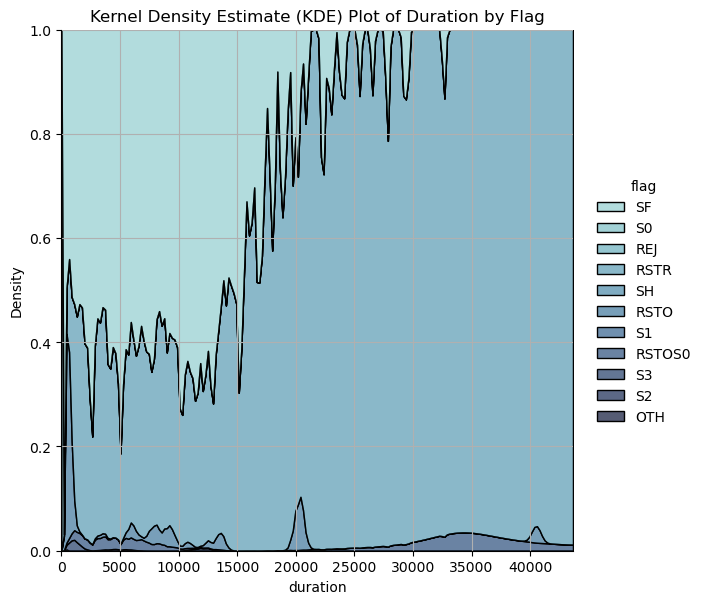

In [120]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=cell_df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

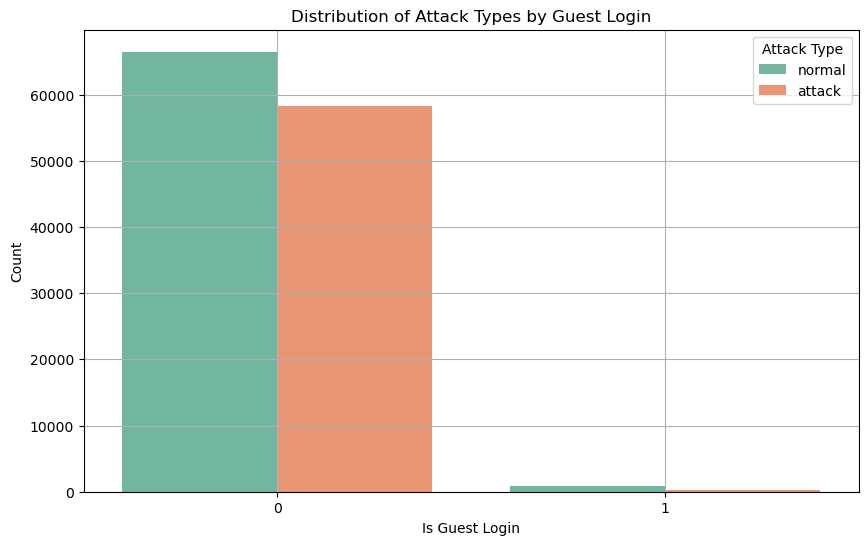

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=cell_df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [122]:
#The majority of attacks happen when the guest is not logged in, according to the data.

## 5. PREPROCESSING

## 5.1 ENCODING

In [123]:
data_obj = cell_df.select_dtypes(['object']).columns
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [124]:
cell_df["attack"].value_counts()

attack
normal    67342
attack    58630
Name: count, dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [126]:
cell_df['protocol_type'] = protocol_type_le.fit_transform(cell_df['protocol_type'])
cell_df['service'] = service_le.fit_transform(cell_df['service'])
cell_df['flag'] = flag_le.fit_transform(cell_df['flag'])
#convert categorical data into numerical data.

In [127]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
cell_df['attack'] = attack_n 

In [128]:
cell_df['attack'].value_counts()

attack
0    67342
1    58630
Name: count, dtype: int64

Now, data is encoded!

<Axes: >

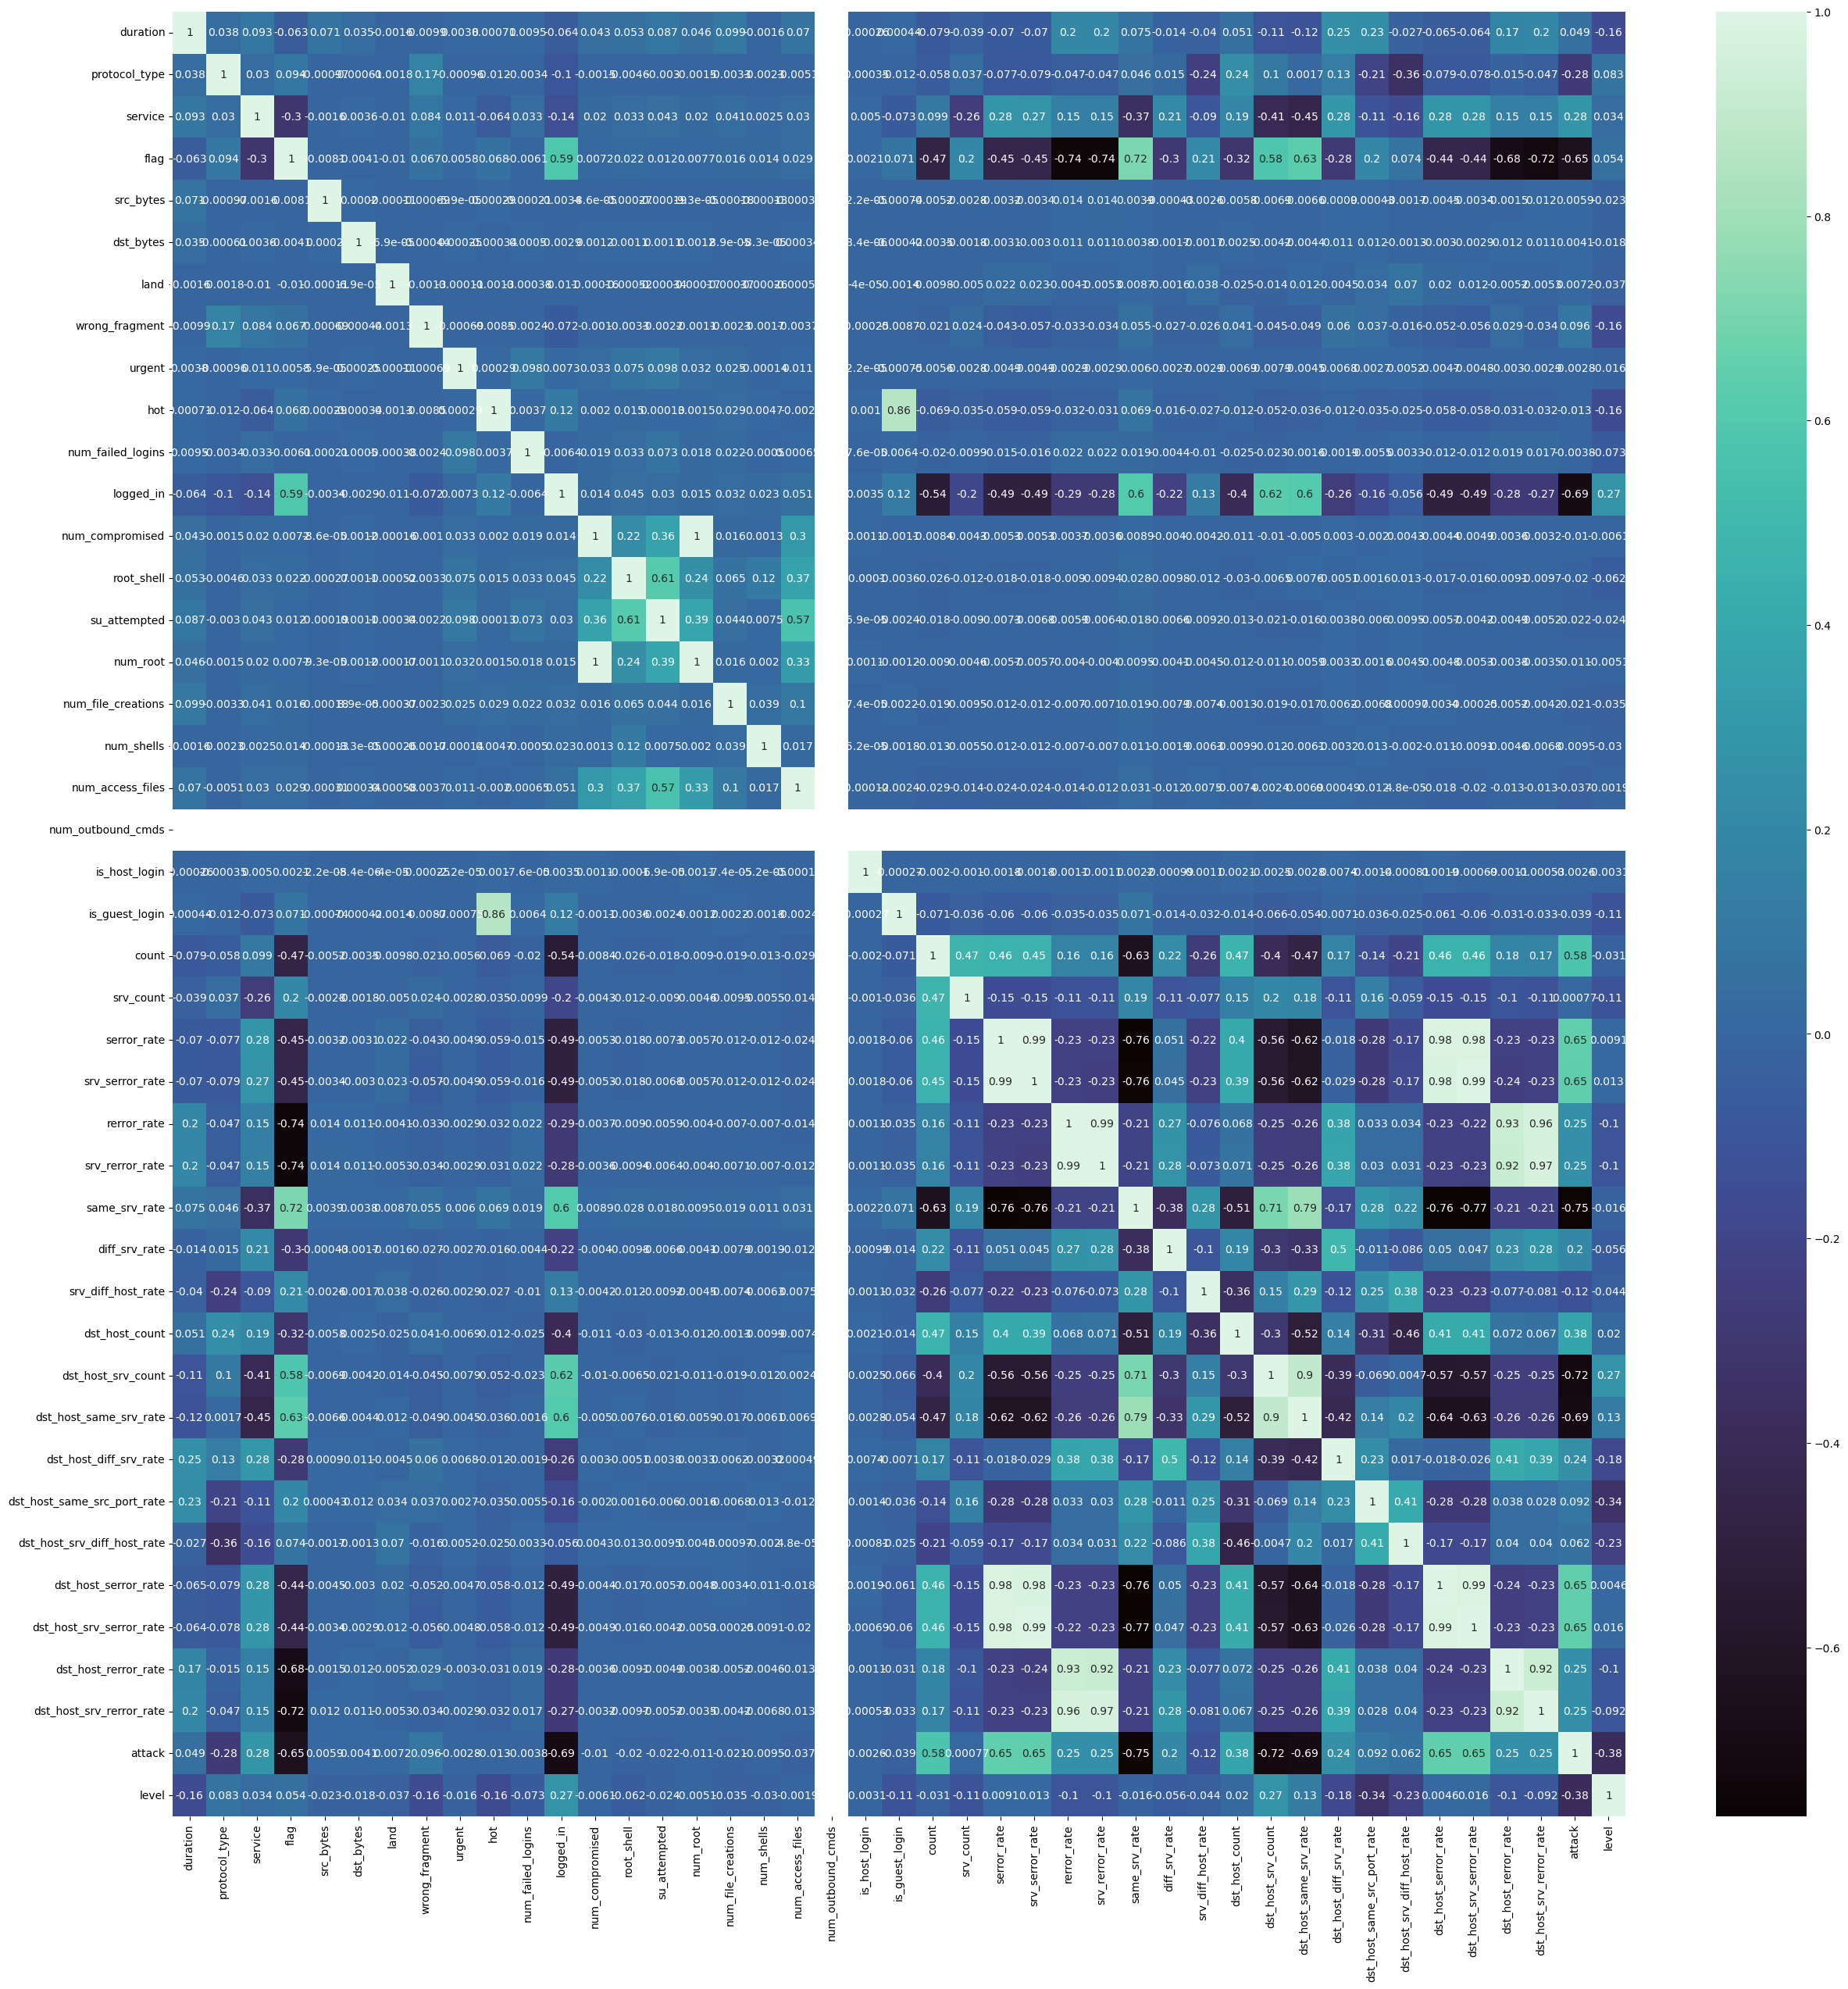

In [129]:
plt.figure(figsize=(30,30))
sns.heatmap(cell_df.corr(), annot= True,cmap='mako')

## 5.2 Data Split

In [130]:
from sklearn.model_selection import train_test_split
y = cell_df['attack'].copy()
x = cell_df.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

In [131]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

## 6 Data modeling using SVM Model

### 6.1 Linear Kernel SVC

In [132]:
# Maps data directly into the original space. It is useful when the number of features is less than the number of samples.

In [133]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV

In [134]:


lin_svc = svm.LinearSVC().fit(x_train, y_train)
Y_pred =lin_svc.predict(x_test)
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

c:\Users\shree\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The Training accuracy =  0.9776479927421184
The Testing accuracy =  0.9770321761219306
------------------------------------------------
linearSVC  accuracy  : 0.977


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [135]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     20006
           1       0.97      0.98      0.98     17786

    accuracy                           0.98     37792
   macro avg       0.98      0.98      0.98     37792
weighted avg       0.98      0.98      0.98     37792



### 6.2 RBF(Radial Basis Funtion) kernel

In [136]:
# Maps data into an infinite-dimensional space using Gaussian functions. It is useful when the number of features is greater than the number of samples.

In [137]:
rbf_svc = svm.SVC(kernel='rbf').fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

The Training accuracy =  0.99718757087775
The Testing accuracy =  0.9966924216765453
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.997


In [138]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20006
           1       0.99      1.00      1.00     17786

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



## 6.3 Poly Kernel

In [139]:
svclassifier_poly = SVC(kernel='poly')
poly = svclassifier_poly.fit(x_train,y_train)
Y_pred_poly =svclassifier_poly.predict(x_test)
print('The Training accuracy = ',poly.score(x_train, y_train))
print('The Testing accuracy = ',poly.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'poly')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))

The Training accuracy =  0.9972669539578136
The Testing accuracy =  0.9969570279424217
------------------------------------------------
SVM (kernel: 'poly')  accuracy  : 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20006
           1       1.00      1.00      1.00     17786

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



## Grid Search

In [140]:
param_grid = {'C': [0.2,0.5,1], 'gamma': [0.5],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid ,verbose=2, cv= 3,refit=False)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 2.0min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 2.5min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.6min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.4min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.7min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.5min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.5min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 2.7min


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 1], 'gamma': [0.5], 'kernel': ['rbf']},
             refit=False, verbose=2)

In [141]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [142]:
rbf_svc = svm.SVC(kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], C=grid.best_params_['C']).fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

0.9993989566795192
0.9966659610499576
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.997


In [143]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20006
           1       1.00      0.99      1.00     17786

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



## Confusion Matrix

In [144]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "mako", annot=annot, fmt='', ax=ax)

C:\Users\shree\AppData\Local\Temp\ipykernel_25572\2836768641.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


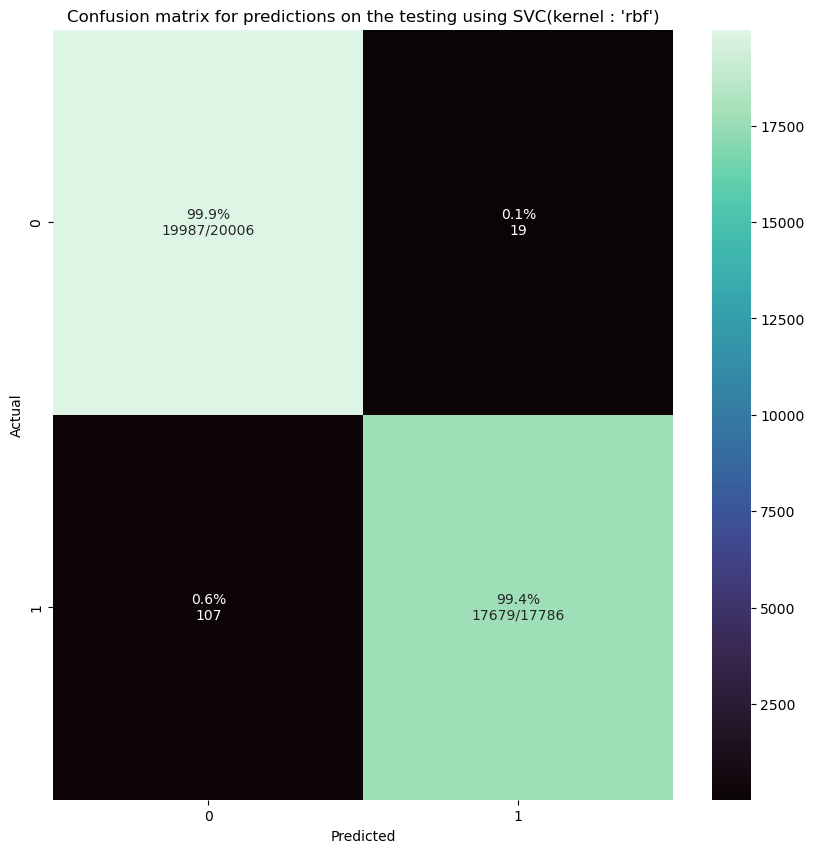

In [145]:
plot_cm(y_test,Y_pred_rbf, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')